In [1]:
import quake_envs
from quake_envs.simulations.utils import *
from quake_envs.simulations.interdep_network import InterdependentNetworkSimulation
import geopandas as gpd
import pandas as pd
from quake_envs.simulations.earthquake_funcs import AttenuationModels
from pyincore import IncoreClient
from geopy.distance import geodesic


In [2]:
def get_bearer_token():
  return "eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJfa1pWbFM4OU1SVWNZaURYUjByaGVVSUh6RzdZWXZ4eXcxZ1l3WjJZajVjIn0.eyJleHAiOjE3NDcwNTg0ODgsImlhdCI6MTc0NzA0NDA4OCwiYXV0aF90aW1lIjoxNzQ3MDQ0MDg1LCJqdGkiOiJmN2RmMTNjOC1hNjk0LTQ2YzctOTQ5Ny0wM2NiZTU5ZTJiMTQiLCJpc3MiOiJodHRwczovL3Rvb2xzLmluLWNvcmUub3JnL2F1dGgvcmVhbG1zL0luLWNvcmUiLCJhdWQiOlsiSU5DT1JFIiwiYWNjb3VudCJdLCJzdWIiOiIyNWYwN2ZmMy1kMGU4LTQxZGQtOWMxOC0xODZmNjg0M2ZhYzUiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWFjdC1hdXRoIiwibm9uY2UiOiJjNzhkODA3OC0yMzlmLTQyMDgtODJkMy1jY2IzOTE4OGVhOGYiLCJzZXNzaW9uX3N0YXRlIjoiOWMzZjZjMWEtNWNlYS00YjU1LWFhYjYtYWVhNjU4NTAzY2IwIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vdG9vbHMuaW4tY29yZS5vcmciLCJodHRwczovL2luY29yZS5uY3NhLmlsbGlub2lzLmVkdSIsImh0dHA6Ly9sb2NhbGhvc3Q6MzAwMCJdLCJyZWFsbV9hY2Nlc3MiOnsicm9sZXMiOlsiZGVmYXVsdC1yb2xlcy1pbi1jb3JlIiwib2ZmbGluZV9hY2Nlc3MiLCJ1bWFfYXV0aG9yaXphdGlvbiIsImluY29yZV91c2VyX3JvbGUiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50Iiwidmlldy1wcm9maWxlIl19fSwic2NvcGUiOiJvcGVuaWQgcHJvZmlsZSBlbWFpbCIsInNpZCI6IjljM2Y2YzFhLTVjZWEtNGI1NS1hYWI2LWFlYTY1ODUwM2NiMCIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYW1lIjoiQW50b25pb3MgTWF2cm90YXMiLCJncm91cHMiOlsiaW5jb3JlX3VzZXIiXSwicHJlZmVycmVkX3VzZXJuYW1lIjoidG9ueV9tYXYiLCJnaXZlbl9uYW1lIjoiQW50b25pb3MiLCJmYW1pbHlfbmFtZSI6Ik1hdnJvdGFzIiwiZW1haWwiOiJhbnRvbmlvc21hdnJvdGFzQGdtYWlsLmNvbSJ9.ctlJgI95NLHrjcWyWwNFmDJH1g6PL98jDqjU9L1OsnDiVMr3hCIjDRDqRNvfN1a2KntL2GMyWV20dZ8vMVYdq65WhaUSe6CiEENnjXnc179_JY0y31Ukt5B7LEWp3E06TBjHTbWaQksv448vX2xuM_uo7LDvbIBgAk_6MwzEWenuNqH_YBq7Uuz-zM_tPxmlYBcA3q_n67nVBji4whwes5ybPdHbwLpRTMu9h-gTLEnkmxXiQE6ZfcYLqw9VzVgHHfhtGKNpuE0USmi_5C26fkPCWy7ND8CBV8dRxHaH0vmCXAHBMrZaSkvL1aHLYKymU0-ZBmxhqfChzDqmBNi3jQ"

bearer_token = get_bearer_token()

In [3]:
client = IncoreClient()

401 Client Error: Unauthorized for url: https://tools.in-core.org/auth/realms/In-core/protocol/openid-connect/token
Connection successful to IN-CORE services. pyIncore version detected: 1.21.0


Set 15 study buildings with bounds: (-118.24289800960332, 34.05326512695456, -118.24024897844738, 34.05434200770638)
Set local road network with 15 links.
Loading network Anaheim, USA...
Network Anaheim, USA loaded
Reading the network data took 0.0 secs

Successfully loaded net df and demand df. Successfully converted them to <quake_envs.simulations.traffic_assignment.FlowTransportNetwork object at 0x00000233EF17E940>


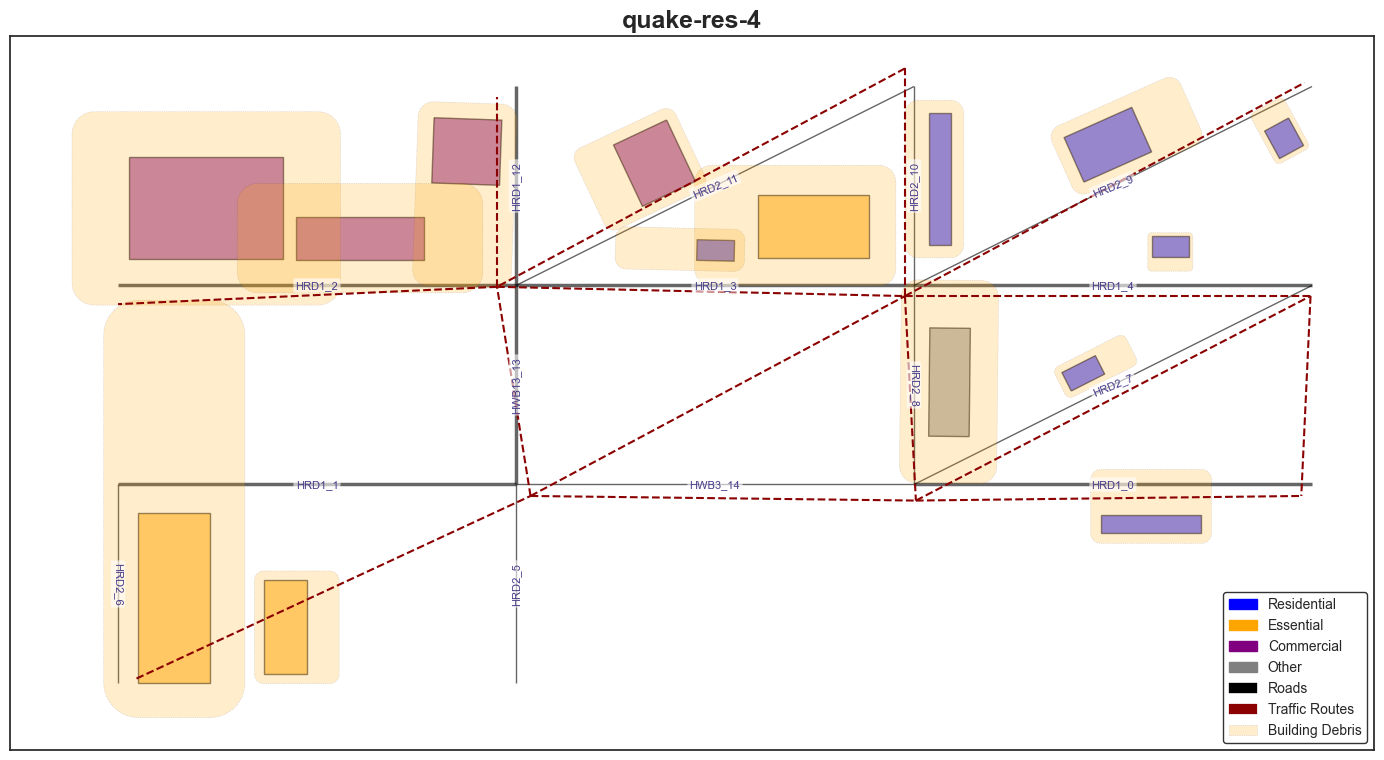

In [6]:
n_agents = 30
env_data = PathUtils.env_data[str(n_agents)]
in_buildings = gpd.read_file(env_data["buildings"])
in_roads = gpd.read_file(env_data["roads"])
in_traffic_gdf = gpd.read_file(env_data["traffic_links"])
in_traffic_dem = pd.read_csv(env_data["traffic_dem"])
in_traffic_net = pd.read_csv(env_data["traffic_net"])

sim = InterdependentNetworkSimulation(
    use_premade=True,
    buildings_study_gdf=in_buildings,
    roads_study_gdf=in_roads,
    traffic_net_df=in_traffic_net,
    traffic_dem_df=in_traffic_dem,
    traffic_links_gdf=in_traffic_gdf,
    verbose=True
)
sim.buildings_study.get_debris()
sim.viz_environment("quake-res-4", show_road_ids=True)



In [5]:
sim.earthquake.DEL_incore_earthquake(bearer_token, "6821c7b81384cc60bc0800aa")

Error: 401 - JWT Expired Signature Error: token signature has expired


In [8]:
earthquake_magnitudes = [7.0, 7.5, 8.0, 8.5, 9.0]
for M in earthquake_magnitudes:
    save_IMs_directory = r"C:\Users\Anton\OneDrive\Desktop\tudelft_thesis\qres_marl\quake_envs_pkg\quake_envs\simulations\earthquake"
    save_bldg_IMs_file = "toy_city_30_bldg_IM_" + str(M) + ".json"
    save_road_IMs_file = "toy_city_30_road_IMs_" + str(M) + ".json"
    src = sim.earthquake.generate_random_point_in_ring(
      sim.center,
      50,
      100
    )
    quake_model_dict = sim.earthquake.create_earthquake_model(
        name='toy_city_30_eq_model',
        description='Earthquake model for toy city with 10 components',
        src_point=src,
        magnitude=M,
        depth=5,
        demand_type='PGA',
        bounds=sim.bounds,
        attenuation_models={AttenuationModels.AB1995: '1.0'}
    )
    model_save_path = r"C:\Users\Anton\OneDrive\Desktop\tudelft_thesis\qres_marl\quake_envs_pkg\quake_envs\simulations\earthquake\incore_eq_model_30.json"
    sim.earthquake.save_earthquake_json(quake_model_dict, model_save_path)
    eq_model = sim.earthquake.read_earthquake_json(model_save_path)
    print(sim.earthquake.magnitude)
    quake_id = sim.earthquake.POST_incore_earthquake(client, eq_model)
    sim.earthquake.POST_incore_eq_building_hazard_values(client, quake_id)
    sim.earthquake.POST_incore_eq_road_hazard_values(client, quake_id, M=M)

    sim.earthquake.save_building_IM(save_IMs_directory, save_bldg_IMs_file)
    sim.earthquake.save_road_IM(save_IMs_directory, save_road_IMs_file)

    sim.earthquake.DEL_incore_earthquake(bearer_token, quake_id)

Successfully created earthquake model dict: {'name': 'toy_city_30_eq_model', 'description': 'Earthquake model for toy city with 10 components', 'eqType': 'model', 'attenuations': {'AtkinsonBoore1995': '1.0'}, 'eqParameters': {'srcLatitude': '34.40344105941938', 'srcLongitude': '-118.53338989413493', 'magnitude': '7.0', 'depth': '5'}, 'visualizationParameters': {'demandType': 'PGA', 'demandUnits': 'g', 'minX': '-118.24289800960332', 'minY': '34.05326512695456', 'maxX': '-118.24024897844738', 'maxY': '34.05434200770638', 'numPoints': '1025', 'amplifyHazard': 'true'}}
{
    "name": "toy_city_30_eq_model",
    "description": "Earthquake model for toy city with 10 components",
    "eqType": "model",
    "attenuations": {
        "AtkinsonBoore1995": "1.0"
    },
    "eqParameters": {
        "srcLatitude": "34.40344105941938",
        "srcLongitude": "-118.53338989413493",
        "magnitude": "7.0",
        "depth": "5"
    },
    "visualizationParameters": {
        "demandType": "PGA",
 